In [ ]:
#import libraries
import numpy as np
from google.colab import drive
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#prepare a list of column names which can be used while dataframe creation
col = ['val', 'qid']
for i in range(1, 138):
  col.append(str(i))


In [ ]:
#load the dataset
df = pd.read_csv("dataset.txt", sep = " ", names = col)
df

,val,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31697,0,qid:4279,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,...,128:1,129:0,130:785,131:46515,132:19,133:49,134:0,135:0,136:0,NaN
31698,1,qid:4279,1:1,2:0,3:1,4:0,5:1,6:1,7:0,8:1,...,128:8,129:1,130:42225,131:34726,132:4,133:4,134:0,135:0,136:0,NaN
31699,1,qid:4279,1:1,2:0,3:1,4:1,5:1,6:1,7:0,8:1,...,128:0,129:0,130:598,131:82,132:116,133:35,134:0,135:2,136:12,NaN
31700,0,qid:4279,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,...,128:805,129:0,130:2782,131:26186,132:50,133:22,134:0,135:0,136:0,NaN


In [ ]:
#take out the rows having qid as 4 from the dataset 

df1 = df.loc[df['qid'] == "qid:4"]
df1

,val,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


In [ ]:
df1.columns

Index(['val', 'qid', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '128', '129', '130', '131', '132', '133', '134', '135', '136', '137'],
      dtype='object', length=139)

In [ ]:
col.remove('val')
print(col)

['qid', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137']


In [ ]:
#replacing NaN values with 137:0 for column "137"
df1['137'] = df1['137'].fillna('137:0')
df1

<ipython-input-63-f1df3fdcf185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['137'] = df1['137'].fillna('137:0')


,val,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,137:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,137:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,137:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,137:0
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,137:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,137:0
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,137:0
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,137:0
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,137:0


In [ ]:
df1.drop(['qid'], axis=1, inplace = True)       #since column "qid" is not needed now so we can drop it
col.remove('qid')

for i in col:
  df1[i] = df1[i].str[(len(i) +1 ):]        #anything before colon (:) is not needed so we remove it

df1 = df1.astype(float)   #converting everything to float for mathematical convenience

<ipython-input-64-b46b2476d7cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['qid'], axis=1, inplace = True)       #since column "qid" is not needed now so we can drop it
<ipython-input-64-b46b2476d7cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = df1[i].str[(len(i) +1 ):]        #anything before colon (:) is not needed so we remove it


In [ ]:
df1

,val,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.000000,...,2.0,9.0,124.0,4678.0,54.0,74.0,0.0,0.0,0.000000,0.0
1,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.000000,...,0.0,8.0,122.0,508.0,131.0,136.0,0.0,0.0,0.000000,0.0
2,0.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.000000,...,2.0,8.0,115.0,508.0,51.0,70.0,0.0,0.0,0.000000,0.0
3,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.000000,...,82.0,17.0,122.0,508.0,83.0,107.0,0.0,10.0,13.350000,0.0
4,1.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.000000,...,11.0,8.0,121.0,508.0,103.0,120.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.000000,...,35.0,1.0,153.0,4872.0,9.0,55.0,0.0,0.0,0.000000,0.0
99,1.0,3.0,0.0,3.0,2.0,3.0,1.000000,0.0,1.000000,0.666667,...,367.0,6.0,153.0,2383.0,18.0,99.0,0.0,16.0,11.316667,0.0
100,2.0,2.0,0.0,2.0,0.0,2.0,0.666667,0.0,0.666667,0.000000,...,0.0,0.0,49182.0,26966.0,15.0,69.0,0.0,193.0,21.935560,0.0
101,1.0,2.0,0.0,2.0,0.0,2.0,0.666667,0.0,0.666667,0.000000,...,0.0,1.0,42877.0,26562.0,12.0,24.0,0.0,56.0,62.920604,0.0


In [ ]:
# adding the preprocessed dataset to drive so that it can be used anytime

destination = '/content/drive/My Drive/IR_A2_Q3_data.csv'
with open(destination, 'w', encoding = 'utf-8-sig') as file:
  df1.to_csv(file)

In [ ]:
df2 = df1.copy(deep=True)       #making a copy of dataframe so that it can be used for DCG calculation
df2

,val,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.000000,...,2.0,9.0,124.0,4678.0,54.0,74.0,0.0,0.0,0.000000,0.0
1,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.000000,...,0.0,8.0,122.0,508.0,131.0,136.0,0.0,0.0,0.000000,0.0
2,0.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.000000,...,2.0,8.0,115.0,508.0,51.0,70.0,0.0,0.0,0.000000,0.0
3,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.000000,...,82.0,17.0,122.0,508.0,83.0,107.0,0.0,10.0,13.350000,0.0
4,1.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.000000,...,11.0,8.0,121.0,508.0,103.0,120.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.000000,...,35.0,1.0,153.0,4872.0,9.0,55.0,0.0,0.0,0.000000,0.0
99,1.0,3.0,0.0,3.0,2.0,3.0,1.000000,0.0,1.000000,0.666667,...,367.0,6.0,153.0,2383.0,18.0,99.0,0.0,16.0,11.316667,0.0
100,2.0,2.0,0.0,2.0,0.0,2.0,0.666667,0.0,0.666667,0.000000,...,0.0,0.0,49182.0,26966.0,15.0,69.0,0.0,193.0,21.935560,0.0
101,1.0,2.0,0.0,2.0,0.0,2.0,0.666667,0.0,0.666667,0.000000,...,0.0,1.0,42877.0,26562.0,12.0,24.0,0.0,56.0,62.920604,0.0


In [ ]:
df1 = df1.sort_values(by='val', ascending=False)          #sort dataframe by relevence score in descending order

In [ ]:
df1

,val,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
7,3.0,3.0,0.0,2.0,1.0,3.0,1.000000,0.000000,0.666667,0.333333,...,349.0,8.0,123.0,281.0,22.0,6.0,0.0,0.0,0.000000,0.0
76,2.0,2.0,0.0,1.0,0.0,2.0,0.666667,0.000000,0.333333,0.000000,...,0.0,0.0,2417.0,721.0,14.0,113.0,0.0,13.0,47.900000,0.0
40,2.0,3.0,2.0,2.0,0.0,3.0,1.000000,0.666667,0.666667,0.000000,...,8.0,3.0,1888.0,9338.0,3.0,11.0,0.0,0.0,0.000000,0.0
36,2.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.000000,0.666667,0.000000,...,0.0,2.0,12028.0,11379.0,26.0,24.0,0.0,77.0,23.959522,0.0
90,2.0,3.0,0.0,3.0,3.0,3.0,1.000000,0.000000,1.000000,1.000000,...,27.0,0.0,814.0,13555.0,108.0,113.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.0,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,0.000000,...,8.0,0.0,868.0,9260.0,246.0,88.0,0.0,0.0,0.000000,0.0
43,0.0,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,0.000000,...,4.0,0.0,797.0,9260.0,237.0,80.0,0.0,0.0,0.000000,0.0
42,0.0,3.0,0.0,3.0,1.0,3.0,1.000000,0.000000,1.000000,0.333333,...,83.0,5.0,144.0,262.0,157.0,179.0,0.0,0.0,0.000000,0.0
41,0.0,3.0,1.0,3.0,2.0,3.0,1.000000,0.333333,1.000000,0.666667,...,195.0,8.0,124.0,206.0,103.0,121.0,0.0,0.0,0.000000,0.0


In [ ]:
df1.reset_index(drop=True, inplace=True)        #reset index values to keep track of dataframe easily

In [ ]:
df1

,val,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,3.0,3.0,0.0,2.0,1.0,3.0,1.000000,0.000000,0.666667,0.333333,...,349.0,8.0,123.0,281.0,22.0,6.0,0.0,0.0,0.000000,0.0
1,2.0,2.0,0.0,1.0,0.0,2.0,0.666667,0.000000,0.333333,0.000000,...,0.0,0.0,2417.0,721.0,14.0,113.0,0.0,13.0,47.900000,0.0
2,2.0,3.0,2.0,2.0,0.0,3.0,1.000000,0.666667,0.666667,0.000000,...,8.0,3.0,1888.0,9338.0,3.0,11.0,0.0,0.0,0.000000,0.0
3,2.0,3.0,0.0,2.0,0.0,3.0,1.000000,0.000000,0.666667,0.000000,...,0.0,2.0,12028.0,11379.0,26.0,24.0,0.0,77.0,23.959522,0.0
4,2.0,3.0,0.0,3.0,3.0,3.0,1.000000,0.000000,1.000000,1.000000,...,27.0,0.0,814.0,13555.0,108.0,113.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,0.000000,...,8.0,0.0,868.0,9260.0,246.0,88.0,0.0,0.0,0.000000,0.0
99,0.0,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,0.000000,...,4.0,0.0,797.0,9260.0,237.0,80.0,0.0,0.0,0.000000,0.0
100,0.0,3.0,0.0,3.0,1.0,3.0,1.000000,0.000000,1.000000,0.333333,...,83.0,5.0,144.0,262.0,157.0,179.0,0.0,0.0,0.000000,0.0
101,0.0,3.0,1.0,3.0,2.0,3.0,1.000000,0.333333,1.000000,0.666667,...,195.0,8.0,124.0,206.0,103.0,121.0,0.0,0.0,0.000000,0.0


#First Objective ===> number of files

In [ ]:
count  =df1['val'].value_counts()   #count number of times each relevence score occured
count

0.0    59
1.0    26
2.0    17
3.0     1
Name: val, dtype: int64

In [ ]:
res=1
for v in count:
  res = res * math.factorial(v)
res

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

#Second Objective ===> Compute nDCG

In [ ]:
#first Compute IDCG on sorted relevence score

IDCG =0
IDCGArr=[]        #keeps track of IDCG values for every row
for i in range(0, 103):
  if i==0:
    IDCG = IDCG + df1['val'][i]       #for first value take relevence score directly
  else:
    logval = math.log2(i+1)
    IDCG = IDCG + (df1['val'][i]/logval)

  IDCGArr.append(IDCG)

print("IDCG  ===>" + str(IDCG))

IDCG  ===>20.989750804831445


In [ ]:
#first Compute DCG on unsorted relevence score

DCG =0
DCGArr=[]       #keeps track of DCG values for every row
for i in range(0, 103):
  if i==0:
    DCG = DCG + df2['val'][i]   #for first value take relevence score directly
  else:
    logval = math.log2(i+1)
    DCG = DCG + (df2['val'][i]/logval)     #for next relevence scores divide by log

  DCGArr.append(DCG)

print("DCG  ===>" + str(DCG))

DCG  ===>12.550247459532576


In [ ]:
#calculate nDCG for the entire dataset
NDCG = DCG/IDCG
NDCG

0.5979226516897831

In [ ]:
#calculate nDCG at position 50 .
NDCG_pos50 = DCGArr[49]/IDCGArr[49]
NDCG_pos50

0.3521042740324887

#Third Objective

In [ ]:
df2 = df2.sort_values(by='75', ascending=False)   #sort column named 75 in reverse order

In [ ]:
precision=[]      #Precision Array
recall =[]        #Recall Array
relevent=0        #keeps a count of total number of relevence scores 

#Calculate Precision
for i in range(0, 103):
  if df2['val'][i]!=0:
    relevent = relevent +1
  precision.append(relevent/(i+1))        

print(precision)

[0.0, 0.0, 0.0, 0.0, 0.2, 0.16666666666666666, 0.2857142857142857, 0.375, 0.3333333333333333, 0.3, 0.36363636363636365, 0.3333333333333333, 0.3076923076923077, 0.35714285714285715, 0.3333333333333333, 0.3125, 0.29411764705882354, 0.3333333333333333, 0.3684210526315789, 0.4, 0.42857142857142855, 0.45454545454545453, 0.4782608695652174, 0.4583333333333333, 0.48, 0.5, 0.48148148148148145, 0.4642857142857143, 0.4482758620689655, 0.4666666666666667, 0.45161290322580644, 0.4375, 0.45454545454545453, 0.4411764705882353, 0.45714285714285713, 0.4444444444444444, 0.4594594594594595, 0.47368421052631576, 0.48717948717948717, 0.475, 0.4878048780487805, 0.47619047619047616, 0.46511627906976744, 0.45454545454545453, 0.4444444444444444, 0.43478260869565216, 0.425531914893617, 0.4166666666666667, 0.40816326530612246, 0.4, 0.39215686274509803, 0.38461538461538464, 0.39622641509433965, 0.4074074074074074, 0.4, 0.4107142857142857, 0.40350877192982454, 0.39655172413793105, 0.4067796610169492, 0.4, 0.40983

In [ ]:
releventpoint=0   #keeps track of relevent relevence score at a particular point

#Calculate recall
for i in range(0, 103):
  if df2['val'][i]!=0:
    releventpoint = releventpoint +1
  recall.append(releventpoint/relevent)

print(recall)

[0.0, 0.0, 0.0, 0.0, 0.022727272727272728, 0.022727272727272728, 0.045454545454545456, 0.06818181818181818, 0.06818181818181818, 0.06818181818181818, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.11363636363636363, 0.11363636363636363, 0.11363636363636363, 0.11363636363636363, 0.13636363636363635, 0.1590909090909091, 0.18181818181818182, 0.20454545454545456, 0.22727272727272727, 0.25, 0.25, 0.2727272727272727, 0.29545454545454547, 0.29545454545454547, 0.29545454545454547, 0.29545454545454547, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.3409090909090909, 0.3409090909090909, 0.36363636363636365, 0.36363636363636365, 0.38636363636363635, 0.4090909090909091, 0.4318181818181818, 0.4318181818181818, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.477272

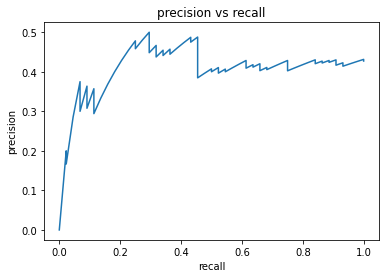

In [ ]:
#plot precision vs recall

plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision vs recall")
plt.show()



1.   In the above graph, the precision and recall values are varying.
2.   The values before 0.42 in recall are varying and it became constant at 0.42 .
3.   The values after 0.42 in recall are dropped below.
4.   Here we can take 0.42 as threshold. If the threshold changes then the recall and precision graph varies. 




#REFERENCES

1. https://www.geeksforgeeks.org/how-to-drop-the-index-column-in-pandas/ 
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
3. https://www.geeksforgeeks.org/python-pandas-dataframe-copy-function/
4. 